In [1]:
%load_ext autoreload
%autoreload 2
%aimport plotnine

import pandas as pd
import numpy as np

from plotnine import *

%matplotlib inline

### stage

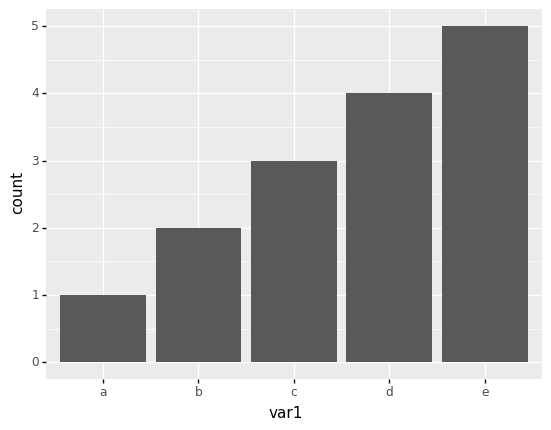

<ggplot: (97654321012345679)>

In [2]:
df = pd.DataFrame({
    'var1': list('abbcccddddeeeee'),
    'cat': list('RSRSRSRRRSRSSRS')
})

(ggplot(df, aes('var1'))
 + geom_bar()
)

Add the corresponding count on top of each bar.

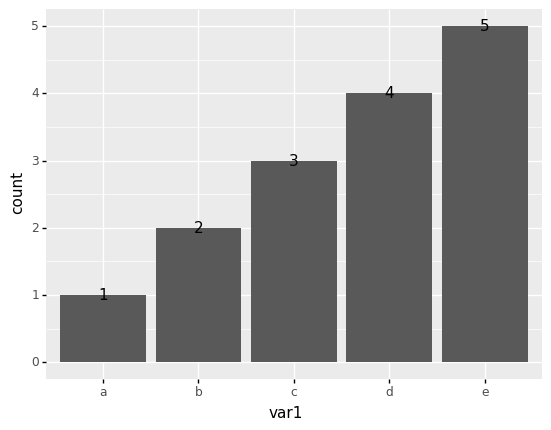

<ggplot: (97654321012345679)>

In [3]:
(ggplot(df, aes('var1'))
 + geom_bar()
 + geom_text(aes(label=after_stat('count')), stat='count')
)

Adjust the `y` position so that the counts do not overlap the bars.

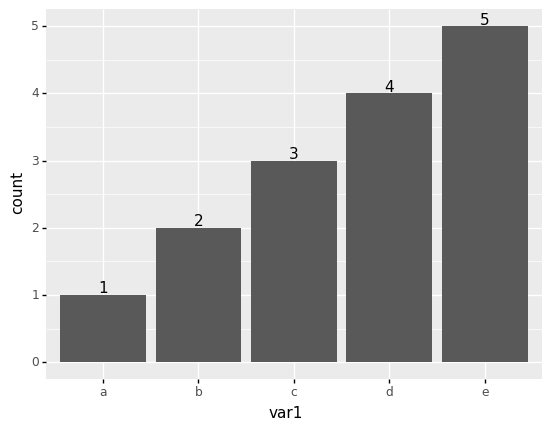

<ggplot: (97654321012345679)>

In [4]:
(ggplot(df, aes('var1'))
 + geom_bar()
 + geom_text(aes(label=after_stat('count'), y=stage(after_stat='count', after_scale='y+.1')), stat='count')
)

Note that this will work even nicely for stacked bars where adjustig the position with `nudge_y=0.1` would not.

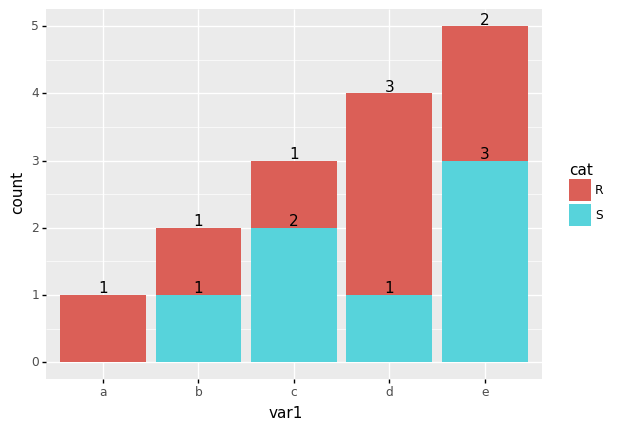

<ggplot: (97654321012345679)>

In [5]:
(ggplot(df, aes('var1', fill='cat'))
 + geom_bar()
 + geom_text(aes(label=after_stat('count'), y=stage(after_stat='count', after_scale='y+.1')), stat='count', position='stack')
)